<a href="https://colab.research.google.com/github/JoeyAviles89z/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Joey_Aviles_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



1) Write a function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000.

What is the probability that a person is drunk after one positive breathalyzer test?
What is the probability that a person is drunk after two positive breathalyzer tests?
How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [0]:
# TODO - code!
P_user = 1/1000 # prior belief
P_non_user = 1 - P_user  # complement of the prior belief
P_pos_given_user = 1 # this is the true positive rate
P_pos_given_non_user = .08 # this is the false positive rate

# My first iteration of Bayes Rule (Bayes Theorem)
numerator = P_pos_given_user*P_user
marginal = (P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user)
posterior_probability = numerator/marginal

print(posterior_probability)

0.012357884330202669


In [0]:
# We have the same person take the drug test again, and they test positive again
# Now what is the likelihood that they are a drug user?
# The posterior probability from the first test becomes our prior for the second iteration.

P_user = posterior_probability # save posterior from first iteration as a new prior
P_non_user = 1 - P_user # calculate the complement of that prior via the law of total probability

# apply Bayes' theorem
numerator = P_pos_given_user*P_user
marginal = (P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user)
posterior_probability = numerator/marginal
print(posterior_probability)

0.13525210993291495


You would need two positive breathalyzer tests in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit.

In [0]:
# Now the third test
P_user = posterior_probability # save posterior from first iteration as a new prior
P_non_user = 1 - P_user # calculate the complement of that prior via the law of total probability

# apply Bayes' theorem
numerator = P_pos_given_user*P_user
marginal = (P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user)
posterior_probability = numerator/marginal
print(posterior_probability)

0.6615996951348605


In [0]:
# Turn all of that into a function
def prob_drunk_use(prob_drunk_prior, false_positive_rate, true_positive_rate, number_of_tests):
    posterior_probability=prob_drunk_prior
    for test in range(0, number_of_tests):
        P_user = posterior_probability # prior belief
        P_non_user = 1 - P_user  # complement of the prior belief
        P_pos_given_user = false_positive_rate # this is the true positive rate
        P_pos_given_non_user = true_positive_rate # this is the false positive rate
        posterior_probability = (P_pos_given_user*P_user)/((P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user))
    return posterior_probability

In [0]:
# try it out
prob_drunk_use(1/1000, 1, .08, 1)

0.012357884330202669

2) Explore scipy.stats.bayes_mvs
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:

In [1]:
from scipy import stats
import numpy as np

# Set Random Seed for Reproducibility
np.random.seed(seed=120)

coinflips = np.random.binomial(n=1, p=.5, size=300)
print(coinflips)

[1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 0 1 1]


In [2]:

# FREQUENTIST APPROACH
# calculate a 95% confidence interval on either side of this.

conf_freq=stats.t.interval(0.95,                    # alpha (ie, confidence level)
                 len(coinflips),                 # length of sample
                 loc = np.mean(coinflips),      # sample mean
                 scale = stats.sem(coinflips) # std error of the mean
                 )
conf_freq

(0.45645018444239355, 0.570216482224273)

In [3]:
# BAYESIAN APPROACH
conf_bayes=stats.bayes_mvs(coinflips, alpha=.95)[0][1] # alpha is the confidence level for this equation
conf_bayes

(0.45644941388619326, 0.5702172527804733)

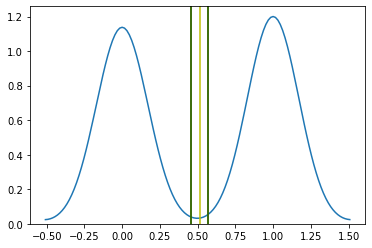

In [7]:
# plot on graph with kernel density estimate
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(coinflips)
# plt.xlim(.3703, .3705)
plt.axvline(x=conf_freq[0], color='red')
plt.axvline(x=conf_freq[1], color='red')
plt.axvline(x=conf_bayes[0], color='green')
plt.axvline(x=conf_bayes[1], color='green')
plt.axvline(x=np.mean(coinflips), color='y');

3) In your own words, summarize the difference between Bayesian and Frequentist statistics
If you're unsure where to start, check out this blog post of Bayes theorem with Python.

Frequentist statistics never updates its belief, because at the core of it the belief is precise enough. With a large amount of sample size, the average can be closely estimated. The Bayesian statistics recieves a belief and holds on to it until it recieves enough new data to converge upon it.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!